In [373]:
import numpy
import pandas
import sklearn.model_selection
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import DistanceMetric
from sklearn.neighbors import BallTree, KDTree

In [467]:
def group_wine_by_quality(quality):
    if (quality <= 4):
        return 0
    if (quality <= 5):
        return 1
    if (quality <= 6):
        return 2
    if (quality <= 7):
        return 3
    return 4

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


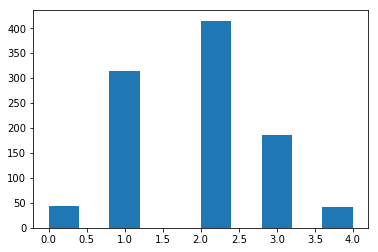

In [473]:
# zbior 1

wine_white = pandas.read_csv("data/winequality-white.csv", delimiter=";")
print(wine_white.columns)
wine_white['quality_4_classes'] = wine_white['quality'].map(lambda x: group_wine_by_quality(x))

wine_white = wine_white[:1000]
plt.hist(wine_white['quality_4_classes'])
plt.show()
columns = ['pH', 'alcohol', 'quality_4_classes']
wine_white = pandas.DataFrame(wine_white, columns=columns)
X = wine_white.drop('quality_4_classes', axis=1)
Y = wine_white['quality_4_classes']
train_to_test_ratio = 0.8
split_idx = (int)(train_to_test_ratio * len(X))
X_train = X[:split_idx]
X_test = X[split_idx:]
Y_train = Y[:split_idx]
Y_test = Y[split_idx:]

In [469]:
#knn = KNeighborsClassifier(n_neighbors=1,  metric='mahalanobis', metric_params={'V': numpy.cov(X.T)})
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)
Y_predicted = knn.predict(X_test)

In [470]:
sklearn.metrics.accuracy_score(Y_test, Y_predicted)

0.32500000000000001

2.85 3.72


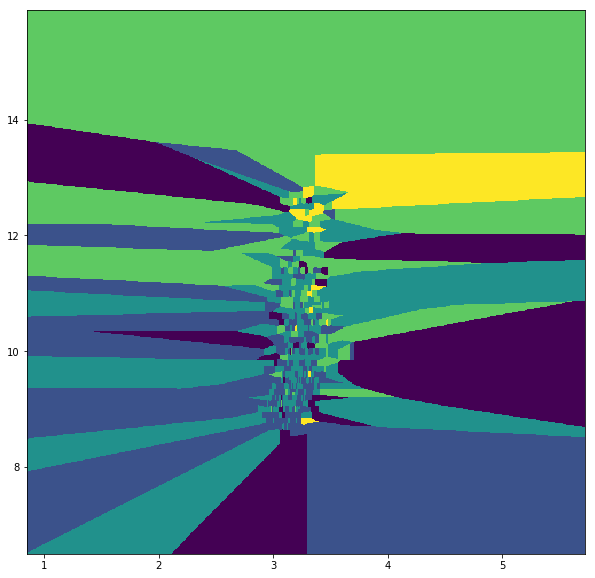

In [471]:
residual = X['pH']
x_min, x_max = residual.min(), residual.max()
x_min, x_max
print (x_min, x_max)
alcohol = X['alcohol']
y_min, y_max = alcohol.min(), alcohol.max()
h = 0.01
xx, yy = numpy.meshgrid(numpy.arange(x_min-2, x_max+2, h), numpy.arange(y_min-2, y_max+2, h))

Z = knn.predict(numpy.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
#plt.pcolormesh(xx, yy, Z, cmap=ListedColormap(['green', 'white', 'blue', 'red', 'pink', 'yellow']))
#plt.pcolormesh(xx, yy, Z, cmap=ListedColormap(['green', 'blue', 'white', 'red', 'yellow' ]))
plt.pcolormesh(xx, yy, Z)
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.show()